# Коеффициент корреляции Пирсона

## Расчет коеффициента корреляции в Numpy



In [1]:
import numpy as np
np.random.seed(100)

In [2]:
#создать массив из 50 случайных целых чисел от 0 до 10
var1 = np.random.randint(0, 10, 50)
var1

array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2, 2, 2, 1, 0, 8, 4, 0, 9, 6, 2, 4, 1,
       5, 3, 4, 4, 3, 7, 1, 1, 7, 7, 0, 2, 9, 9, 3, 2, 5, 8, 1, 0, 7, 6,
       2, 0, 8, 2, 5, 1])

In [3]:
#создать положительно коррелированный массив с некоторым случайным шумом
var2 = var1 + np.random.normal(0, 10, 50)
var2

array([ 13.92575746,   8.37958129,   6.71967572,  10.59753947,
         5.59603535,  -4.43738512,   9.68770162,   7.38488768,
        18.15574179,  16.78978297,   4.21426255,  -9.17894159,
        -0.8499993 ,  -4.31187446,   9.42536252, -10.96393454,
         3.0687456 ,   8.5365277 ,  10.17144275,  -4.03770522,
        10.85967248,   9.59973786,   6.91555442,  14.78227928,
        10.00283569, -14.44659863,   3.4258809 ,   6.75915012,
         4.84057844,   0.50907502,  -9.01691177,   5.61237434,
         0.12086266, -10.98144167,   7.71113962,   6.17078367,
         1.20831746,   8.75751769,  28.80595342,  -3.46700861,
        -1.91143345,  -8.54225772,  15.63406468,   2.8361877 ,
        -7.02225772,  -7.38562393,   4.04661119,   2.84200853,
         3.14377547,  12.08439231])

Для построения диаграммы рассеяния используем Matplotlib

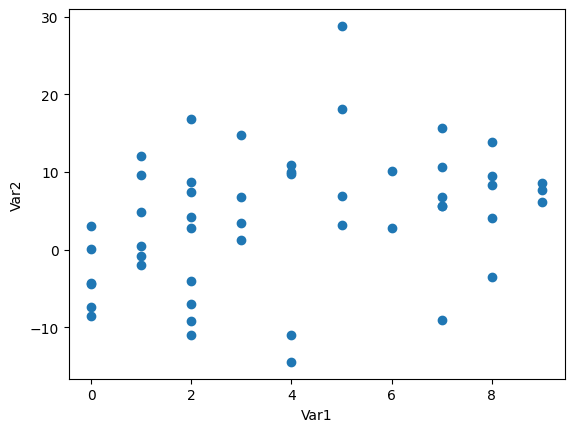

In [4]:
import matplotlib.pyplot as plt
plt.scatter(var1,var2)
plt.xlabel("Var1")
plt.ylabel("Var2")
plt.show()

Для построения корреляционной матрицы используется функция corrcoef()

In [8]:
np.corrcoef(var1, var2)

array([[1.       , 0.3350184],
       [0.3350184, 1.       ]])

Мы видим, что коэффициент корреляции между этими двумя переменными составляет 0,335, что является положительной корреляцией.

По умолчанию эта функция создает матрицу коэффициентов корреляции. Если бы мы только хотели вернуть коэффициент корреляции между двумя переменными, мы могли бы используйте следующий синтаксис:

In [7]:
np.corrcoef(var1, var2)[0,1]

0.3350183976385703

## Расчет коеффициента корреляции с помощью SciPy

 В Scipy коеффициент корреляции Пирсона вычисляется с помощью функции pearsonr(), которая возвращает коэффициент корреляции Пирсона вместе с двусторонним p-значением. Значение p становится полезным при проверке гипотез статистическими методами.

In [26]:
import scipy.stats
scipy.stats.pearsonr(var1, var2)

PearsonRResult(statistic=0.33501839763857016, pvalue=0.017397558087782924)

Коэффициент корреляции – 0,335, а двустороннее значение p – 0,017. Поскольку это значение p меньше 0,05, мы можем заключить, что существует статистически значимая корреляция между двумя переменными.

Если вы хотите получить только коэффициент корреляции, вы можете извлечь его, используя его индекс.

Поскольку это первое значение, оно находится с индексом 0.

In [27]:
scipy.stats.pearsonr(var1, var2)[0]

0.33501839763857016

Значение коэффициента корреляции Спирмена можно рассчитать следующим образом:

In [28]:
scipy.stats.spearmanr(var1, var2)

SignificanceResult(statistic=0.38439049342361803, pvalue=0.005850110826793166)

Значение коэффициента корреляции Кендала можно рассчитать следующим образом:

In [29]:
scipy.stats.kendalltau(var1, var2)

SignificanceResult(statistic=0.26437037797548824, pvalue=0.00938841951129169)

## Расчет корреляции в Pandas

Если необходимо вычислить корреляции между несколькими переменными в Pandas DataFrame, необходимо использовать функцию corr()

In [30]:
import pandas as pd

data = pd.DataFrame(np.random.randint(0, 10, size=(5, 3)), columns=['A', 'B', 'C'])
data

,A,B,C
0,5,2,6
1,1,1,5
2,9,2,5
3,6,4,6
4,7,9,7


In [31]:
#рассчитать коэффициенты корреляции для всех попарных комбинаций
corr = data.corr()
corr

,A,B,C
A,1.000000,0.399139,0.261892
B,0.399139,1.000000,0.893807
C,0.261892,0.893807,1.000000


для коэффициентов Спирмена и Кендалла указывается параметр method

In [32]:
corr = data.corr(method = 'spearman')
corr

,A,B,C
A,1.000000,0.564288,0.158114
B,0.564288,1.000000,0.865181
C,0.158114,0.865181,1.000000


In [33]:
corr = data.corr(method = 'kendall')
corr

,A,B,C
A,1.000000,0.527046,0.223607
B,0.527046,1.000000,0.824958
C,0.223607,0.824958,1.000000


И если вас интересует только расчет корреляции между двумя конкретными переменными в DataFrame, вы можете указать переменные:

In [34]:
data['A'].corr(data['B'])

0.39913852510648923

коэффициенты Спирмена и Кендалла

In [35]:
print(data['A'].corr(data['B'], method = 'spearman'))
print(data['A'].corr(data['B'], method = 'kendall'))

0.5642880936468347
0.5270462766947298


Для вычисления коэффициента Пирсона вместе с уровнем значимости, используют функцию pearsonr()

In [38]:
scipy.stats.pearsonr(data['A'], data['B'])

PearsonRResult(statistic=0.3991385251064893, pvalue=0.5056370738620004)

In [39]:
scipy.stats.spearmanr(data['A'], data['B'])

SignificanceResult(statistic=0.5642880936468347, pvalue=0.32172333582430024)

In [40]:
scipy.stats.kendalltau(data['A'], data['B'])

SignificanceResult(statistic=0.5270462766947298, pvalue=0.206507295485425)

Можно построить корреляционную матрицу с помощью тепловой карты seaborn

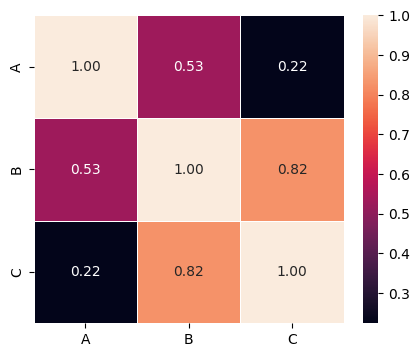

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4), dpi =100)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

Рассчитаем р-уровень значимости для переменных с коэффициентом корреляции -0,49 и -0,78

In [44]:
pAB = scipy.stats.pearsonr(data['A'], data['B'])
pBC = scipy.stats.pearsonr(data['B'], data['C'])
print (pAB)
print (pBC)

PearsonRResult(statistic=0.3991385251064893, pvalue=0.5056370738620004)
PearsonRResult(statistic=0.8938067072686303, pvalue=0.04087312564852755)


Т.к. р-значение для переменных А и В больше 0,05 , следовательно установленная корреляционная связь между переменными не является статистически значимой

Таким образом, можно сделать вывод, что только между переменнеми В и С установлена статистически значимая высокая корреляция по шкале Чеддека